# CapsNets on Fashion Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_fashion_mnist

In [3]:
(X_train, y_train), (X_test , y_test) = load_fashion_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

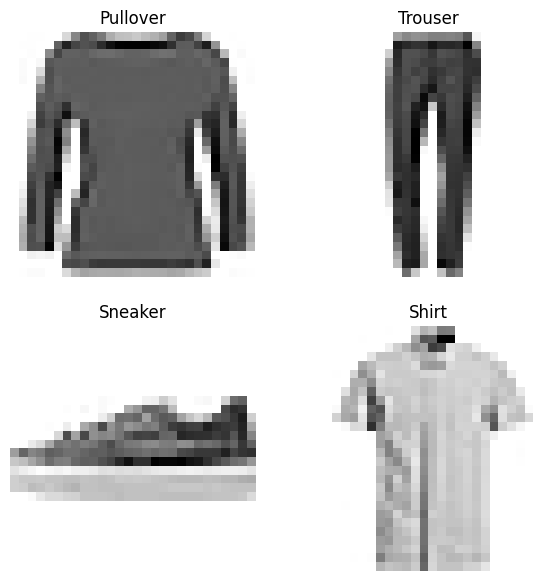

In [5]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [6]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [7]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model._name = "CapsNet-Fashion-MNIST"
model.compile()
model.summary()

Model: "CapsNet-Fashion-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'])

Epoch 1/10: 100%|██████████| 16/16 [00:10<00:00,  3.12it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 10/10: 100%|██████████| 16/16 [00:06<00:00,  2.36it/s, Loss : 0.0014]


{'accuracy': ListWrapper([0.66015625, 0.7548828125, 0.783203125, 0.8193359375, 0.8408203125, 0.8505859375, 0.8720703125, 0.8837890625, 0.9140625, 0.919921875]),
 'precision': ListWrapper([0.6340391772964512, 0.7690260321276461, 0.8033758297614311, 0.8213184147550546, 0.8432682558554921, 0.8561921816458116, 0.8807340002463664, 0.8917392024888898, 0.9186264696629417, 0.9248109376800738]),
 'recall': ListWrapper([0.66015625, 0.7548828125, 0.783203125, 0.8193359375, 0.8408203125, 0.8505859375, 0.8720703125, 0.8837890625, 0.9140625, 0.919921875]),
 'f1': ListWrapper([0.61207631319946, 0.741483623558959, 0.7682329051530694, 0.8128774214316893, 0.8360513376035487, 0.8395341363671551, 0.8640541506044976, 0.8802554181090844, 0.9123650949315943, 0.9188078964824022]),
 'loss': ListWrapper([0.009211976081132889, 0.0040789637714624405, 0.0029955727513879538, 0.002525054384022951, 0.0023058124352246523, 0.002075641416013241, 0.0018809473840519786, 0.0017043025000020862, 0.0015144066419452429, 0.0013

In [9]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


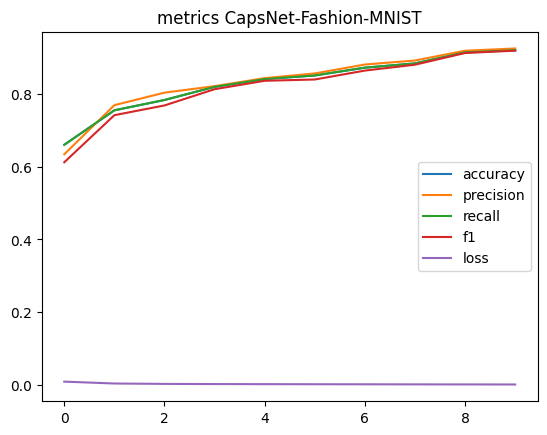

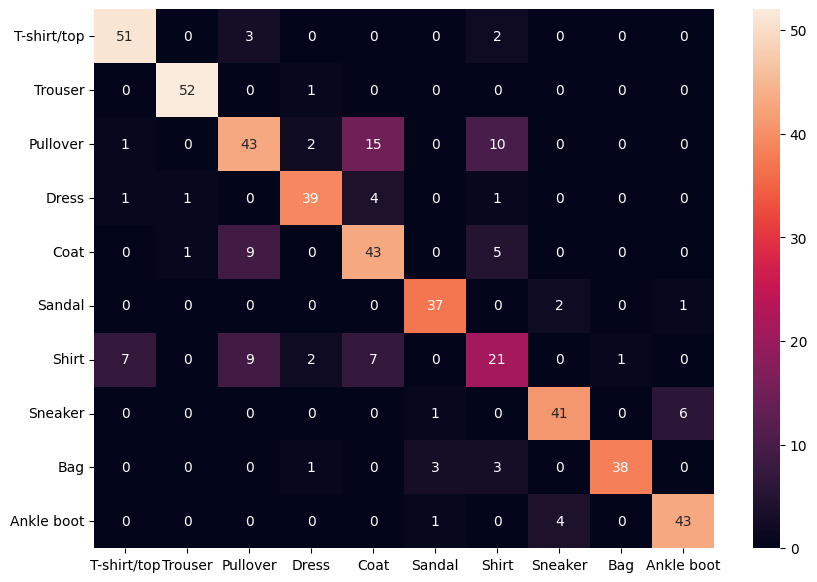

In [10]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [12]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-Fashion-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-Fashion-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense_2 (Dense)             multiple                  82432     
                                                                 
 dense_3 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
